<a href="https://colab.research.google.com/github/jtao/VIST271/blob/main/Image_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Filtering with PIL

Jian Tao, Texas A&M University

Feb 28, 2022

We will explore image filtering with Python PIL library.

First a few librabries will be imported.

In [153]:
oak_path = "https://github.com/jtao/VIST271/raw/main/images/post_oak.jpg"
oak_file = "post_oak.jpg"

## Read Image

We first download an image from a URL and then open it with the Image.open function in PIL. Let's convert it to the grayscale and work on one channel only.

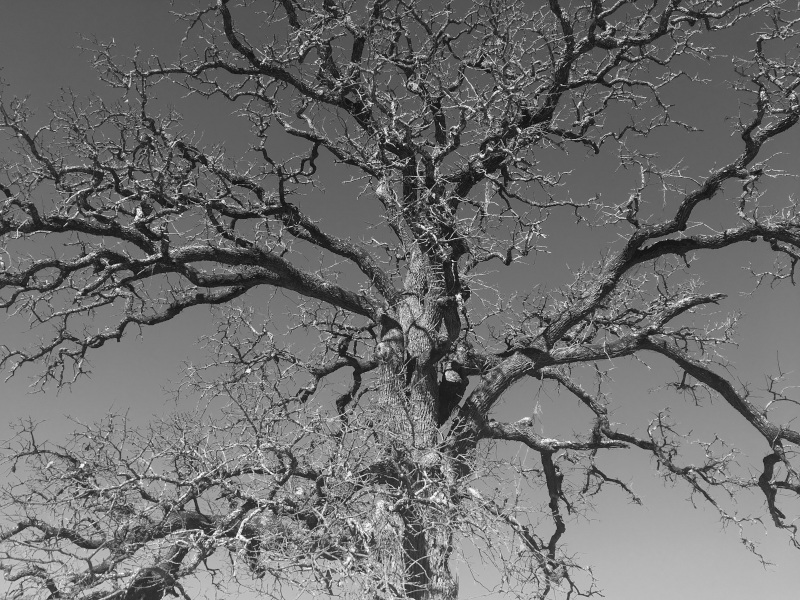

In [154]:
import numpy as np
import os
import random
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
import urllib.request
urllib.request.urlretrieve(oak_path, oak_file)
oak = Image.open(oak_file).convert('L')
oak

In [155]:
oak_mat = np.array(oak)

In [156]:
oak_mat.shape

(600, 800)

Let's pull out row 200-209 and column 200-209 of the matrix and print the numbers out.

In [157]:
print (oak_mat[200:210, 200:210])

[[ 91  61  82  90 114  94  81  87 133 113]
 [ 42  44  65 115 118 106 113  64  47 164]
 [109 112  80  59  61  41  62  71 169 167]
 [ 62 104 110  41  33 163 190  61 143 157]
 [ 31  66  49  81  54 135  55  29  43  69]
 [175  48  41  32  73  74  50  49  31  44]
 [132 186 102  90  76  84  39  41  47  38]
 [ 90 114 117  75  57  91  38  37  40  42]
 [ 98  81 113 109  84  71  59  56  49  43]
 [ 99  76 114 106 104 122  81  36  35  36]]


Let's try to plot directly from the array oak_mat

In [158]:
Image.fromarray(oak_mat[200:210, 200:210])

We can find out where it is by coloring it white in the original matrix.

In [159]:
#oak_mat[200:210, 200:210] = 255
#Image.fromarray(oak_mat)

## Segmentation filter
### Let's try to set the value of a pixel to 255 when it is greater than 100 and 0 otherwise.

In [160]:
def segmentation(im, cutoff=100):
  im_mat = np.array(im)
  for i in range(im_mat.shape[0]):
    for j in range(im_mat.shape[1]):
      if im_mat[i, j] > cutoff:
        im_mat[i, j] = 255
      else:
        im_mat[i, j] = 0
  return im_mat

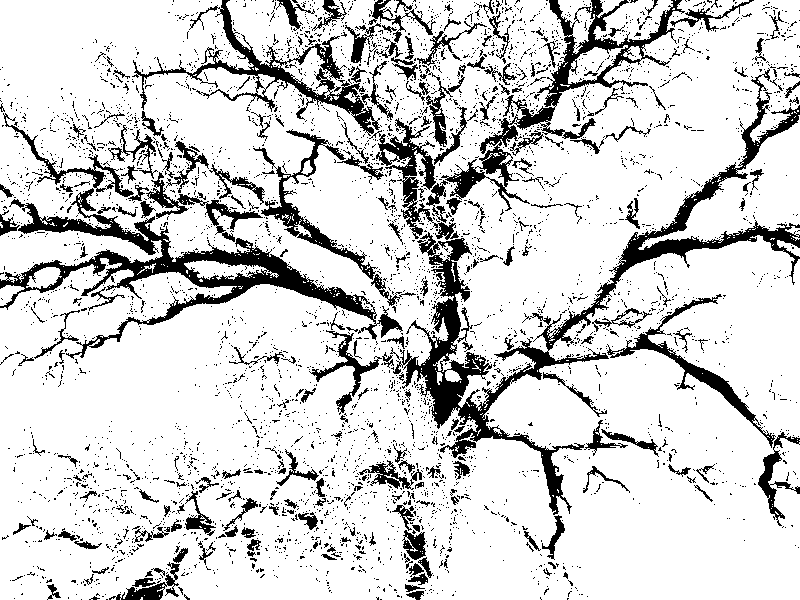

In [161]:
Image.fromarray(segmentation(oak, cutoff=70))

## Let's add some noise to the original image
The code below to add noise could be considered as a segmentation filter as well.

In [162]:
def add_noise(im, ratio=0.4):
  im_mat = np.array(im)
  mask = np.random.random(im_mat.shape)
  for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
      if mask[i, j] > 1-ratio:
        im_mat[i, j] = 255
  return im_mat

In [296]:
oak_noisy = Image.fromarray(add_noise(oak, ratio=0.1))

## Identity Filter/Kernel

In [194]:
def identity_filter(size=3):
  if size % 2 == 0:
    print ("the size must be an odd number!")
    return 
  filter_mat = np.zeros((size, size))
  filter_mat[size//2, size//2] = 1
  return filter_mat

In [165]:
identity_kernel(9)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Mean Filter/Kernel

In [166]:
def mean_filter(size=3):
  filter_mat = np.full((size, size), 1/(size*size))
  return filter_mat

In [245]:
mean_filter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

## Some other commonly used filters

In [246]:
sharpen_filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur_filter = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline_filter = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

In [286]:
def apply_filter(im, kernel):
  im_mat = np.array(im)
  return np.convolve(im, kernel)

In [301]:
def convolve2d(image, kernel, padding=0, strides=1):
  # Cross Correlation
  kernel = np.flipud(np.fliplr(kernel))

  # Gather Shapes of Kernel + Image + Padding
  xKernShape = kernel.shape[0]
  yKernShape = kernel.shape[1]
  xImgShape = image.shape[0]
  yImgShape = image.shape[1]

  # Shape of Output Convolution
  xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
  yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
  output = np.zeros((xOutput, yOutput))

  # Apply Equal Padding to All Sides
  if padding != 0:
    imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    print(imagePadded)
  else:
    imagePadded = image

  # Iterate through image
  for y in range(image.shape[1]):
    # Exit Convolution
    if y > image.shape[1] - yKernShape:
      break
    # Only Convolve if y has gone down by the specified Strides
    if y % strides == 0:
      for x in range(image.shape[0]):
        # Go to next row once kernel is out of bounds
        if x > image.shape[0] - xKernShape:
          break
        try:
          # Only Convolve if x has moved by the specified Strides
          if x % strides == 0:
            output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
        except:
          break

  return output

In [302]:
convolve2d(oak_mat, mean_filter(3))

array([[ 90.44444444,  90.66666667,  90.44444444, ...,  86.77777778,
         96.44444444, 104.22222222],
       [ 90.33333333,  90.33333333,  90.33333333, ...,  85.66666667,
        100.11111111, 114.33333333],
       [ 90.22222222,  90.11111111,  90.22222222, ...,  88.55555556,
        110.22222222, 126.55555556],
       ...,
       [179.66666667, 175.11111111, 177.        , ..., 188.11111111,
        188.        , 188.11111111],
       [166.66666667, 163.88888889, 168.77777778, ..., 188.22222222,
        188.11111111, 188.44444444],
       [155.33333333, 153.88888889, 158.22222222, ..., 188.33333333,
        188.22222222, 188.88888889]])

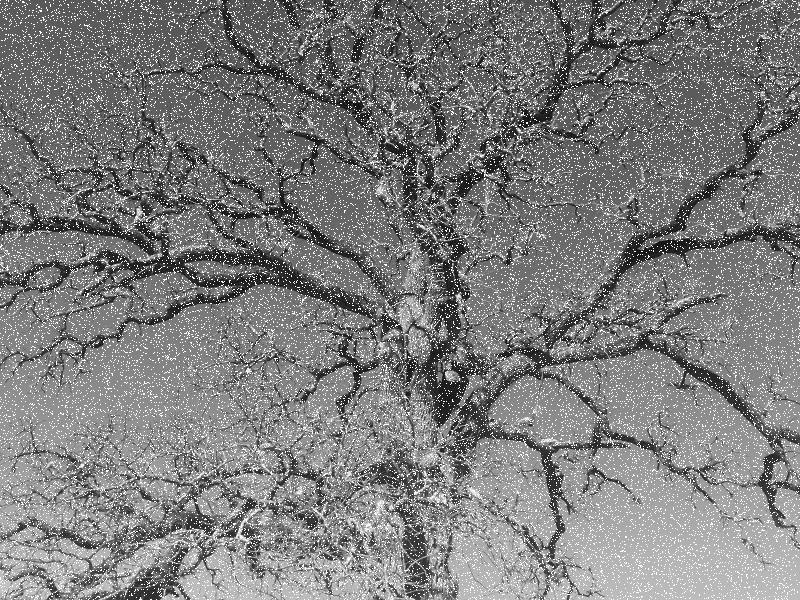

In [287]:
oak_noisy

In [305]:
ret = convolve2d(oak_mat, mean_filter(3))

In [306]:
Image.fromarray(ret)

OSError: ignored

<PIL.Image.Image image mode=F size=798x598 at 0x7F5793BEF690>

In [279]:
np.sum(np.multiply(oak_mat[0:3,0:3], mean_filter(3)))

90.44444444444444